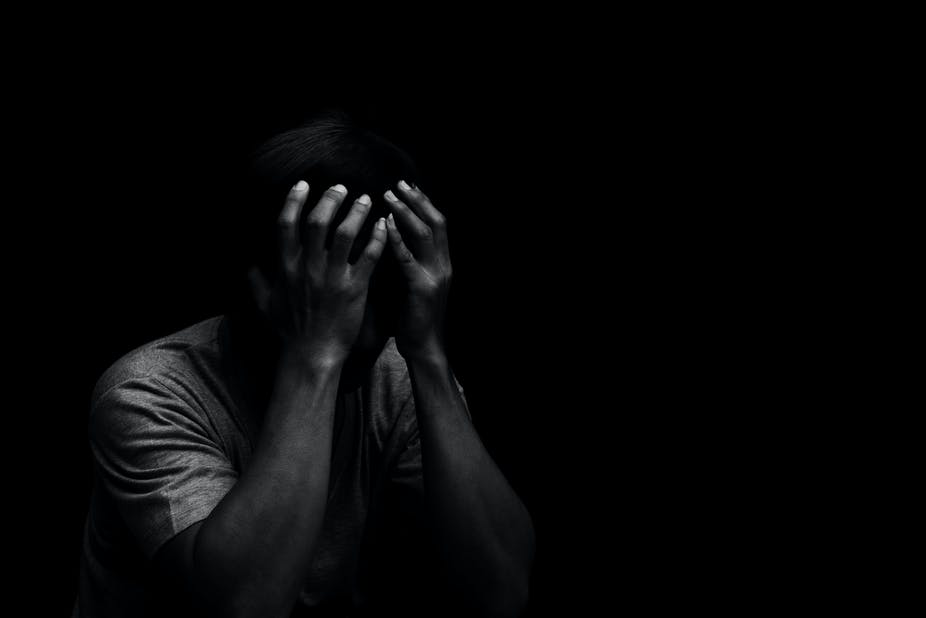

# Libraries

In [ ]:
# libraries 
import matplotlib.pyplot as plt
import seaborn as srn
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.metrics import*
from sklearn.model_selection import train_test_split

# Data gathering and visulaization

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df=pd.read_csv('/kaggle/input/suicide-rates-overview-1985-to-2016/master.csv')
df

In [ ]:
print('shape of the dataframe is :',df.shape)

Data is large in size and can be predicted through Regression

In [ ]:
for i in df.columns:
    print(i,end=", ")

# Pre-processing

* Leakage checking (if any)
* Leakage filling (if any)
* Unnecessary column or row deletion (if any)

In [ ]:
# leakage checking

lk_dat=df.isnull()
for col in df.columns:
    print('leakage in '+col+' is :',len(lk_dat[lk_dat[col]==True]))

The HDI column hold (19456 / 27820) * 100 = 69.9352 % of leakage in a single column.

So we are going to take a dummy datset and the this from there and predcit both and see which have more accuracy. Before doing pipeline we'll create that dummy dataframe 

In [ ]:
# filling the leakage

df.replace(np.NaN,-99999.0,inplace=True)
df

# Feature Engineering

The country-year column looks unnecessary as the data is also present in 2 other columns. we are drpoping it.

In [ ]:
df.drop('country-year',1,inplace=True)
df

The age column is a categorical data .


In [ ]:
age=[]
for i in df['age']:
    age.append(i[:-6])
df['age'].value_counts()

It is visible it has 6 different types.

In [ ]:
age=['5-14 years','15-24 years','25-34 years','35-54 years','55-74 years','75+ years']

In [ ]:
k=0
for i in age:
    df['age'].replace(i,k,inplace=True)
    k+=1
df['age']

Encoding other columns too

In [ ]:
#  function to turn categorical data into numerical data

def non_num_data(df):
    columns=df.columns.values
    
    for column in columns:
        text_digit_vals={}
        def con_to_int(val):
            return text_digit_vals[val]
        
        if df[column].dtype!=np.int64 and df[column].dtype!=np.float64:
            column_contents=df[column].values.tolist()
            unique_elements=set(column_contents)
            x=0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique]=x
                    x+=1
            df[column]=list(map(con_to_int,df[column]))
    return df

In [ ]:
non_num_data(df)
df

# Pipelines

Creating X and Y for the data

In [ ]:
X_df=df.drop('suicides_no',1)
y_df=df['suicides_no']

In [ ]:
print(X_df.shape,y_df.shape)

* Re-shuffling the data

In [ ]:
df=df.sample(frac=1)
df

* train-test split 

As the data is large   a 70-30 train-test split is good for prediction

In [ ]:

X_train,X_test,y_train,y_test=train_test_split(X_df,y_df,test_size=0.3)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

Regression models

LinearRegression

In [ ]:

model=linear_model.LinearRegression()
model.fit(X_train,y_train)
print('accuracy of linearregression : ',model.score(X_train,y_train))
y_pr1=model.predict(X_test)
print('MSE of the data using Linear Regression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using Linear Regression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using Linear Regression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

In [ ]:
a=np.arange(1,len(y_test)+1,1)
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pr1,label='predicted',s=5)
plt.legend()
plt.show()

Randomforestregressor

In [ ]:

model=RandomForestRegressor()
model.fit(X_train,y_train)
print('accuracy of randomforestregression : ',model.score(X_train,y_train))
y_pr1=model.predict(X_test)
print('MSE of the data using randomforestregression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using randomforestregression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using randomforestregression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

In [ ]:
plt.scatter(a,y_test,label='true',s=5)
plt.legend()
plt.scatter(a,y_pr1,label='predicted',s=5)
plt.legend()
plt.show()

RandomForestRegressor showed huge accuracy over the model.

Previously we decided to predict the model after droping the HDI column. 

we are going to execute that now.

In [ ]:
X_trr=X_train.drop('HDI for year',1)
X_ter=X_test.drop('HDI for year',1)

In [ ]:
model.fit(X_trr,y_train)
print('accuracy of randomforestregression : ',model.score(X_trr,y_train))
y_pr1=model.predict(X_ter)
print('MSE of the data using randomforestregression : ',mean_squared_error(y_test,y_pr1))
print('r-squared error of the data using randomforestregression : ',1-r2_score(y_test,y_pr1))
print('RMSE of the data using randomforestregression : ',np.sqrt(mean_squared_error(y_test,y_pr1)))

Surely it shows that droping that 'HDI for year' column increases the accuracy of the model and it concludes that heavy leakage may mislead the data and omitting that in a huge dataset might help you gain higher accuracy

# UPVOTE if you like this EDA  :)

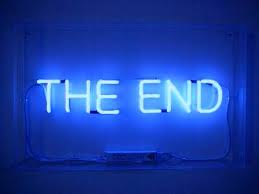